In [ ]:
!pip install medmnist
# https://github.com/MedMNIST/MedMNIST/tree/main

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached 

In [ ]:
import numpy as np
from tensorflow import keras
from medmnist import DermaMNIST

base = 'DermaMNIST'
n_train = 7007
n_val   = 1003
n_test  = 2005
subtract_mean = True
precision = 'float32'

data = DermaMNIST( split="train", download=True)
x_train = np.zeros( (len(data), 28,28,3) )
y_train_dec = np.zeros( len(data), dtype='int8' )
for i in range( 0, len(data) ):
  x_train[i,:,:,:], y_train_dec[i] = data[i,:]

data = DermaMNIST( split="val", download=True)
x_val = np.zeros( (len(data), 28,28,3) )
y_val_dec = np.zeros( len(data), dtype='int8' )
for i in range( 0, len(data) ):
  x_val[i,:,:,:], y_val_dec[i] = data[i,:]

data = DermaMNIST( split="test", download=True)
x_test = np.zeros( (len(data), 28,28,3) )
y_test_dec = np.zeros( len(data), dtype='int8' )
for i in range( 0, len(data) ):
  x_test[i,:,:,:], y_test_dec[i] = data[i,:]

num_classes = np.max( y_train_dec ) + 1

x_train = x_train[0:n_train,:,:,:]
x_val = x_val[0:n_val,:,:,:]
x_test  = x_test[0:n_test,:,:,:]

y_train_dec = y_train_dec[0:n_train]
y_val_dec  = y_val_dec[0:n_test]
y_test_dec  = y_test_dec[0:n_test]

x_train = x_train.astype( precision ) / 255
x_val = x_val.astype( precision ) / 255
x_test  = x_test.astype( precision )/ 255



y_train = keras.utils.to_categorical( y_train_dec, num_classes )
y_val   = keras.utils.to_categorical( y_val_dec,  num_classes )
y_test  = keras.utils.to_categorical( y_test_dec,  num_classes )

y_train = y_train.astype( precision )
y_test  = y_test.astype( precision )

if subtract_mean:
  mean = np.mean( x_train, axis = 0 )
  x_train = x_train - mean
  x_val   = x_val   - mean
  x_test  = x_test  - mean

data

Using downloaded and verified file: /root/.medmnist/dermamnist.npz


<ipython-input-27-33b35b187323>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_train[i,:,:,:], y_train_dec[i] = data[i,:]


Using downloaded and verified file: /root/.medmnist/dermamnist.npz
Using downloaded and verified file: /root/.medmnist/dermamnist.npz


<ipython-input-27-33b35b187323>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_val[i,:,:,:], y_val_dec[i] = data[i,:]
<ipython-input-27-33b35b187323>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_test[i,:,:,:], y_test_dec[i] = data[i,:]


Dataset DermaMNIST of size 28 (dermamnist)
    Number of datapoints: 2005
    Root location: /root/.medmnist
    Split: test
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'actinic keratoses and intraepithelial carcinoma', '1': 'basal cell carcinoma', '2': 'benign keratosis-like lesions', '3': 'dermatofibroma', '4': 'melanoma', '5': 'melanocytic nevi', '6': 'vascular lesions'}
    Number of samples: {'train': 7007, 'val': 1003, 'test': 2005}
    Description: The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.
    License: CC BY-NC 4.0

5


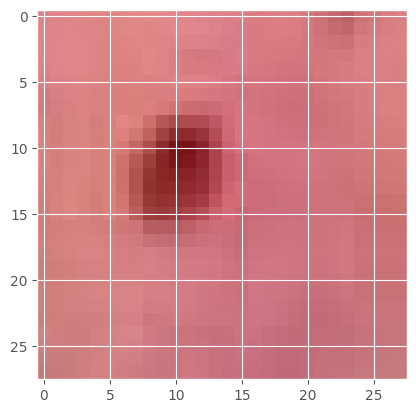

In [ ]:
import matplotlib.pyplot as plt
ind = 8
  img = x_val[ind,:,:,:] + mean
print( y_val_dec[ind])
plt.imshow( img)


In [ ]:
print( "x_train >>", np.shape(x_train) )
print( "y_train >>", np.shape(y_train) )

print( "x_val >>", np.shape(x_val) )
print( "y_val >>", np.shape(y_val) )

print( "x_test >>", np.shape(x_test) )
print( "y_test >>", np.shape(y_test) )

x_train >> (7007, 28, 28, 3)
y_train >> (7007, 7)
x_val >> (1003, 28, 28, 3)
y_val >> (1003, 7)
x_test >> (2005, 28, 28, 3)
y_test >> (2005, 7)


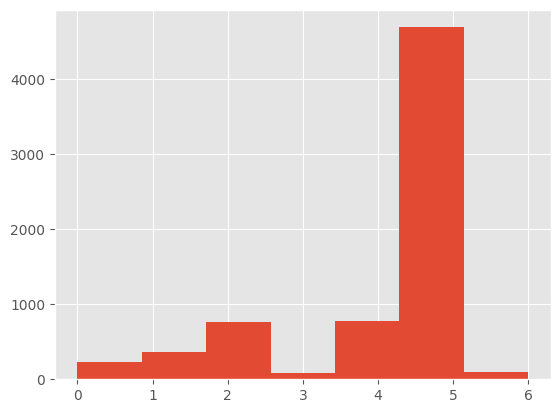

In [ ]:
plt.style.use('ggplot')
plt.hist(y_train_dec, bins=7)
plt.show()

#Meaning of labels: { '0': 'actinic keratoses and intraepithelial carcinoma',
#                     '1': 'basal cell carcinoma',
#                     '2': 'benign keratosis-like lesions',
#                     '3': 'dermatofibroma',
#                     '4': 'melanoma',
#                     '5': 'melanocytic nevi',
#                     '6': 'vascular lesions'}

#Number of samples: {'train': 7007, 'val': 1003, 'test': 2005}
#Description: The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.

In [ ]:
### Definição do modelo de aprendizagem ###
import tensorflow as tf
import os
import random
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout, Conv2D, BatchNormalization, Activation, MaxPooling2D, SpatialDropout1D, AveragePooling2D, Input, Flatten,  GlobalAveragePooling2D, GlobalMaxPooling1D, Conv1D, Reshape, MaxPooling1D, PReLU, ZeroPadding2D, Multiply, Add, Concatenate
from tensorflow.keras.layers.experimental.preprocessing import RandomCrop, RandomFlip, RandomContrast, CenterCrop


def createModelCNN(seed: int = 42, lr = 1e-2):

  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)
  tf.experimental.numpy.random.seed(seed)
  #tf.set_random_seed(seed)
  os.environ['TF_CUDNN_DETERMINISTIC'] = '1' # When running on the CuDNN backend, two further options must be set
  os.environ['TF_DETERMINISTIC_OPS'] = '1'
  os.environ["PYTHONHASHSEED"] = str(seed)   # Set a fixed value for the hash seed
  print(f"Random seed set as {seed}")

  nDrop = [ .25,  .25,  .0  ];
  nAct = [ 'relu', 'relu', 'relu'];
  init = tf.keras.initializers.HeNormal(seed=seed)

  nFilter = [ 64, 96, 128 ]
  nBlock  = [  5,   4,   4 ]

  nUnits = 256

  model = Sequential()
  model.add( ZeroPadding2D( 2 ) )
  model.add( RandomFlip("horizontal", seed = seed) )
  model.add( RandomCrop( 28, 28, seed = seed ) )

  for i in range( 0, 3 ):
    for b in range( 0, nBlock[ i ] ):
      model.add( Conv2D( nFilter[ i ], ( 3, 3 ), padding = 'same', kernel_initializer = init, kernel_regularizer = l2( 5e-4 ), bias_regularizer = None ) );
      model.add( BatchNormalization() );
      model.add( Activation( nAct[ i ] ) )
    model.add( MaxPooling2D( ( 2, 2 ) ) )
    model.add( Dropout( rate=nDrop[i] , seed=seed ) )
  model.add( Flatten() )
  model.add( Dense( nUnits, activation = 'relu', kernel_regularizer = l2( 5e-4 ) ) )
  model.add( Dense( num_classes, activation = 'softmax' ) )
  loss = CategoricalCrossentropy()# label_smoothing = .1 )
  model.compile( loss = loss, optimizer = keras.optimizers.SGD( learning_rate=lr) , metrics = [ 'accuracy' ] )
  model.fit( x_train[0:2,:,:,:], y_train[0:2,:], epochs = 1, verbose = 0 )
  return model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
folder = '/content/drive/My Drive/UFOP/1_ENSINO/eletivaDeepLearning/pesos/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.callbacks  import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau, History, CSVLogger

def lr_schedule_cosine( epoch ):
  epoch += epoch_begin
  epochs_warm = 5
  if epoch <= epochs_warm:
    lr = (epoch/epochs_warm) * lr_begin
  else:
    t = epoch - epochs_warm
    T = epoch_end + epochs_warm
    lr = .5 * ( 1 + np.cos( ( t  * np.pi ) / T ) ) * lr_begin
  return lr


epoch_begin = 0;
epoch_end   = 20;
period = 10
lr_begin    = 1e-1;
BATCH_SIZE = 16;

fileName = 'DermaMNIST'
fileCSV = fileName
fileRead = fileName + '-' + str(epoch_begin)
fileWrite = fileName + '-{epoch}'

h1 = History()
lr_scheduler = LearningRateScheduler( lr_schedule_cosine )
csv_logger = CSVLogger( ( folder + fileCSV + '.csv' ), append = True, separator = ';' )
checkpoint = ModelCheckpoint( filepath = ( folder + fileWrite + '.h5'  ), monitor = 'loss', verbose = 0, period = period, save_best_only = False )
calls = [ h1, lr_scheduler, checkpoint, csv_logger ]

seed = 123
model = createModelCNN( seed = seed, lr = 1e-1 )

if epoch_begin > 0:
  model.load_weights( folder + fileRead + '.h5'  )

model.fit( x_train, y_train, initial_epoch=epoch_begin, epochs=epoch_end,  batch_size = BATCH_SIZE, callbacks = calls, validation_data = ( x_val, y_val ), shuffle = True )


Random seed set as 123
Epoch 1/20
438/438 [==============================] - 10s 22ms/step - loss: 26.1121 - accuracy: 0.0325 - val_loss: 14.2828 - val_accuracy: 0.0329 - lr: 0.0000e+00
Epoch 2/20
438/438 [==============================] - 9s 22ms/step - loss: 2.7208 - accuracy: 0.6678 - val_loss: 2.5166 - val_accuracy: 0.6680 - lr: 0.0200
Epoch 3/20
438/438 [==============================] - 9s 20ms/step - loss: 2.4931 - accuracy: 0.6710 - val_loss: 2.3684 - val_accuracy: 0.6810 - lr: 0.0400
Epoch 4/20
438/438 [==============================] - 9s 19ms/step - loss: 2.3915 - accuracy: 0.6806 - val_loss: 2.2887 - val_accuracy: 0.6869 - lr: 0.0600
Epoch 5/20
438/438 [==============================] - 9s 21ms/step - loss: 2.2979 - accuracy: 0.6825 - val_loss: 2.1564 - val_accuracy: 0.6949 - lr: 0.0800
Epoch 6/20
438/438 [==============================] - 9s 20ms/step - loss: 2.1890 - accuracy: 0.6839 - val_loss: 2.0859 - val_accuracy: 0.7109 - lr: 0.1000
Epoch 7/20
438/438 [==============

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


438/438 [==============================] - 9s 21ms/step - loss: 1.7691 - accuracy: 0.7019 - val_loss: 1.6619 - val_accuracy: 0.7278 - lr: 0.0938
Epoch 11/20
438/438 [==============================] - 8s 19ms/step - loss: 1.6835 - accuracy: 0.7076 - val_loss: 1.6488 - val_accuracy: 0.7099 - lr: 0.0905
Epoch 12/20
438/438 [==============================] - 8s 19ms/step - loss: 1.6070 - accuracy: 0.7074 - val_loss: 1.5691 - val_accuracy: 0.7168 - lr: 0.0864
Epoch 13/20
438/438 [==============================] - 9s 20ms/step - loss: 1.5453 - accuracy: 0.7143 - val_loss: 1.4707 - val_accuracy: 0.7218 - lr: 0.0819
Epoch 14/20
438/438 [==============================] - 8s 18ms/step - loss: 1.4761 - accuracy: 0.7253 - val_loss: 1.4460 - val_accuracy: 0.7248 - lr: 0.0768
Epoch 15/20
438/438 [==============================] - 9s 19ms/step - loss: 1.4247 - accuracy: 0.7243 - val_loss: 1.4271 - val_accuracy: 0.7228 - lr: 0.0713
Epoch 16/20
438/438 [==============================] - 9s 21ms/step - 

In [ ]:
### Acurária de Teste ###
from sklearn import metrics

y_pred = model.predict( x_test )
y_pred_dec = np.argmax( y_pred, axis = 1)
print("Accuracy:",metrics.accuracy_score( y_test_dec, y_pred_dec ))

63/63 [==============================] - 1s 8ms/step
Accuracy: 0.7481296758104738


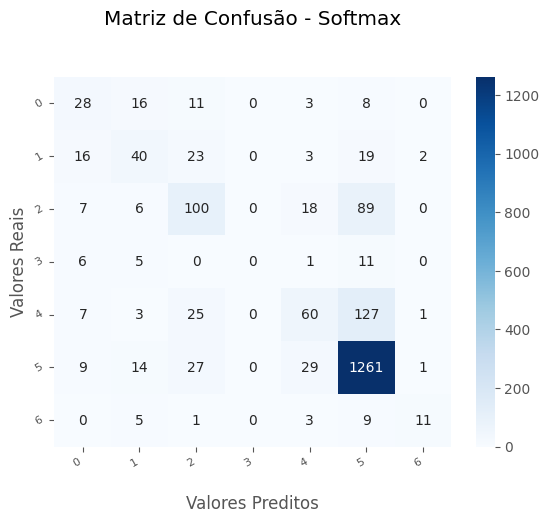

In [ ]:
### Confusion matrix

import seaborn as sns

cf_matrix = metrics.confusion_matrix(y_test_dec, y_pred_dec)
ax = sns.heatmap(cf_matrix, annot=True, fmt="d", cmap='Blues')

ax.set_title('Matriz de Confusão - Softmax\n\n');
ax.set_xlabel('\nValores Preditos')
ax.set_ylabel('Valores Reais');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["0", "1", "2", "3", "4", "5", "6"], rotation=30, horizontalalignment='right', fontsize=8)
ax.yaxis.set_ticklabels(["0", "1", "2", "3", "4", "5", "6"], rotation=30, horizontalalignment='right', fontsize=8)

## Display the visualization of the Confusion Matrix.
plt.show()


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_4 (ZeroPadd  (None, 32, 32, 3)         0         
 ing2D)                                                          
                                                                 
 random_flip_4 (RandomFlip)  (None, 32, 32, 3)         0         
                                                                 
 random_crop_4 (RandomCrop)  (None, 28, 28, 3)         0         
                                                                 
 conv2d_52 (Conv2D)          (None, 28, 28, 64)        1792      
                                                                 
 batch_normalization_52 (Ba  (None, 28, 28, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_52 (Activation)  (None, 28, 28, 64)       

219/219 [==============================] - 3s 8ms/step


Text(0, 0.5, '$f_2$')

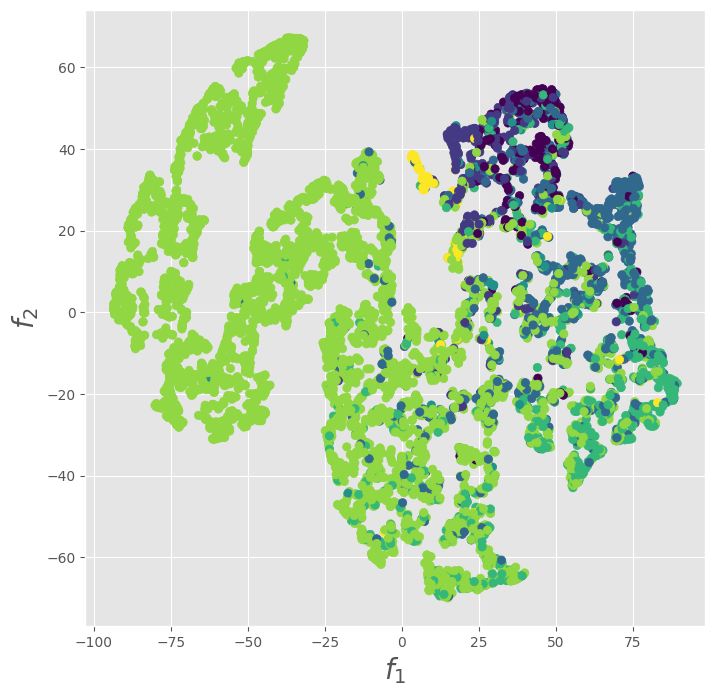

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

layer_name = "dense_9"
n_samples = n_train

m1 = Model( inputs = model.input, outputs = model.get_layer( layer_name ).output )
x2 = m1.predict( x_train )
features = x2.reshape( np.shape( x2 )[0], np.prod( np.shape( x2 )[1:4] ) )

features = features[0:n_samples,:]
tsne = TSNE( n_components=2 );
features_tsne = tsne.fit_transform( features );  #esta parte demora
#save(my_folder + file + '-tsne.npy', features_tsne)
#features_tsne = load(my_folder + file + '-tsne.npy')

plt.rcParams["figure.figsize"] = ( 8, 8 )
plt.grid( True )
plt.scatter( features_tsne[0:len(features),0], features_tsne[0:len(features),1], c=y_train_dec[ 0:len(features)]  )
plt.xlabel( "$f_1$", fontsize = 20 )
plt.ylabel( "$f_2$", fontsize = 20 )

63/63 [==============================] - 1s 7ms/step


Text(0, 0.5, '$f_2$')

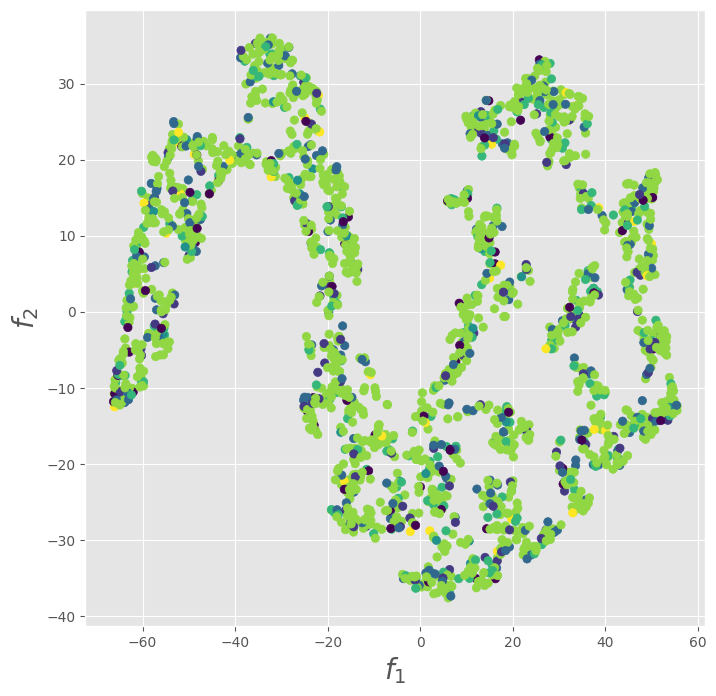

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

layer_name = "dense_9"
n_samples = n_test

m1 = Model( inputs = model.input, outputs = model.get_layer( layer_name ).output )
x2 = m1.predict( x_test )
features = x2.reshape( np.shape( x2 )[0], np.prod( np.shape( x2 )[1:4] ) )

features = features[0:n_samples,:]
tsne = TSNE( n_components=2 );
features_tsne = tsne.fit_transform( features );  #esta parte demora
#save(my_folder + file + '-tsne.npy', features_tsne)
#features_tsne = load(my_folder + file + '-tsne.npy')

plt.rcParams["figure.figsize"] = ( 8, 8 )
plt.grid( True )
plt.scatter( features_tsne[0:len(features),0], features_tsne[0:len(features),1], c=y_train_dec[ 0:len(features)]  )
plt.xlabel( "$f_1$", fontsize = 20 )
plt.ylabel( "$f_2$", fontsize = 20 )